In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import joblib
import os


In [3]:
X_train = pd.read_csv('data/processed/X_train.csv')
X_test = pd.read_csv('data/processed/X_test.csv')
y_train = pd.read_csv('data/processed/y_train.csv').squeeze()
y_test = pd.read_csv('data/processed/y_test.csv').squeeze()


In [4]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))


              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7985
           1       0.27      0.63      0.37      1058

    accuracy                           0.76      9043
   macro avg       0.60      0.70      0.61      9043
weighted avg       0.86      0.76      0.79      9043

ROC-AUC: 0.7720942977913455


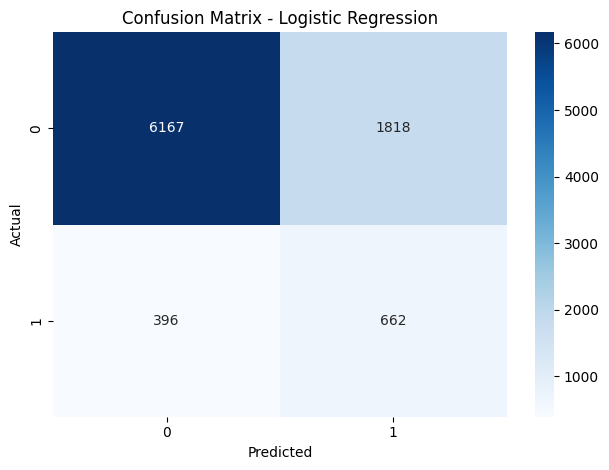

In [5]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('visuals/confusion_matrix_logistic.png')
plt.show()


In [6]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.66      0.20      0.31      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.63      9043
weighted avg       0.87      0.89      0.87      9043

ROC-AUC: 0.795855532526133


In [7]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.67      0.20      0.31      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.60      0.63      9043
weighted avg       0.88      0.90      0.87      9043

ROC-AUC: 0.7964203320734884


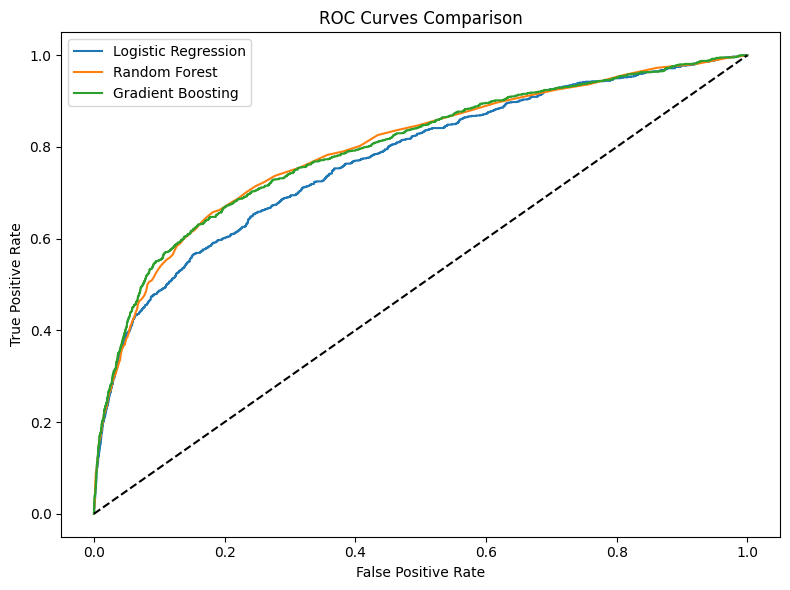

In [8]:
plt.figure(figsize=(8,6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('visuals/roc_curves_comparison.png')
plt.show()


In [10]:
best_model = gb
os.makedirs('models', exist_ok=True)
joblib.dump(best_model, 'models/best_model.joblib')


['models/best_model.joblib']